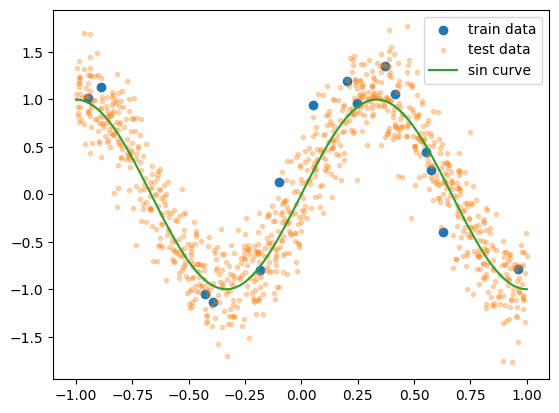

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import scipy.optimize as optimize

np.random.seed(40)


# generate data like sin curve
def generate_data(n, sigma):
    x = np.random.uniform(-1, 1, n)
    y = np.sin(1.5 * np.pi * x) + np.random.normal(0, sigma, n)
    return x, y

train_data = generate_data(15, 0.3)
test_data = generate_data(1000, 0.3)
plt.scatter(train_data[0], train_data[1], c='tab:blue', label='train data')
plt.scatter(test_data[0], test_data[1], marker=".", c='tab:orange', label='test data', alpha=0.3)

x = np.linspace(-1, 1, 100)
y = np.sin(1.5 * np.pi * x)
plt.plot(x, y, c='tab:green', label='sin curve')
plt.legend()
plt.show()

deg is 2 loss 12.04962393424154	train error 0.8032775199003785	test error 0.6309674601528198
deg is 3 loss 3.8922476818770404	train error 0.25900239065383934	test error 0.1970390992482269
deg is 4 loss 3.1665319811275037	train error 0.21024760546114912	test error 0.30336210593930024
deg is 5 loss 1.1395083647258017	train error 0.07318016275065876	test error 0.18774611553833337
deg is 6 loss 1.0524612800565039	train error 0.06658667930511382	test error 0.20751676827625576
deg is 7 loss 0.9873642527787857	train error 0.06214282080395932	test error 0.35391074413882084
deg is 8 loss 0.9885816327981201	train error 0.06251942136585333	test error 0.41591863806845725
deg is 9 loss 0.9751143673414105	train error 0.06209135319304184	test error 0.4906613748297927
deg is 10 loss 0.9764796019407113	train error 0.06190149690560119	test error 0.46622015671664624
deg is 11 loss 0.9727381875541039	train error 0.06192913794107697	test error 0.6242193540450205
deg is 12 loss 0.9759408162745243	train erro

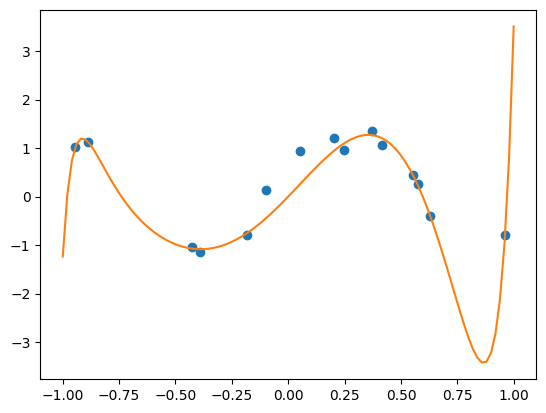

In [117]:
degree = 60 # 多項式の次数

y = train_data[1]
alpha = 0.001 # 正則化項の係数

beta_prev = np.random.randn(1)

train_loss = []
test_loss = []
for deg in range(2, degree+1):
    beta_init = np.append(-beta_prev, 1)

    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly = poly_features.fit_transform(train_data[0].reshape(-1, 1))

    def ridge_loss(beta, x_poly=x_poly,  y=y, alpha=alpha):
        y_pred = np.dot(x_poly, beta)
        err = (y - y_pred) ** 2
        return np.sum(err) + alpha * np.sum(np.abs(beta))

    res = optimize.minimize(ridge_loss, beta_init)
    print("deg is", deg, "loss", res.fun, end="\t")
    print("train error", mean_squared_error(y, np.dot(x_poly, res.x)), end="\t")
    train_loss.append(mean_squared_error(y, np.dot(x_poly, res.x)))
    print("test error", mean_squared_error(test_data[1], np.dot(poly_features.fit_transform(test_data[0].reshape(-1, 1)), res.x)))
    test_loss.append(mean_squared_error(test_data[1], np.dot(poly_features.fit_transform(test_data[0].reshape(-1, 1)), res.x)))

    beta_prev = res.x

poly_features = PolynomialFeatures(degree=degree, include_bias=False)
xx = np.linspace(-1, 1, 100)
plt.scatter(train_data[0], train_data[1], c='tab:blue', label='train data')
plt.plot(xx, poly_features.fit_transform(xx.reshape(-1, 1)) @ beta_prev, c='tab:orange', label='fitted curve')

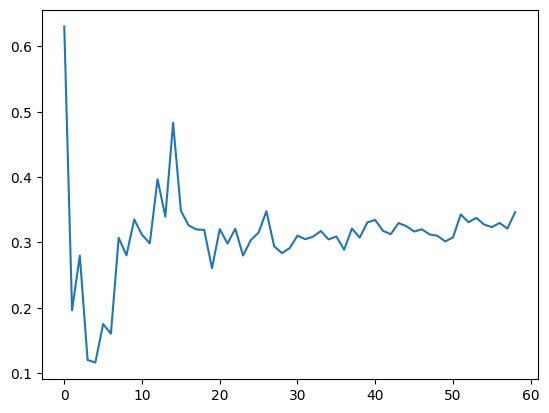

In [115]:
plt.plot(test_loss)

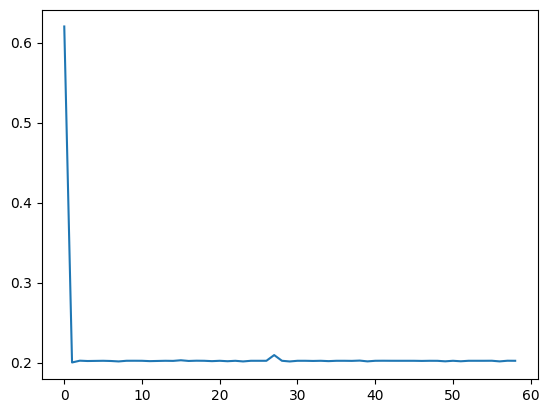

In [94]:
# N = 15
# alpha = 0.5
plt.plot(test_loss)

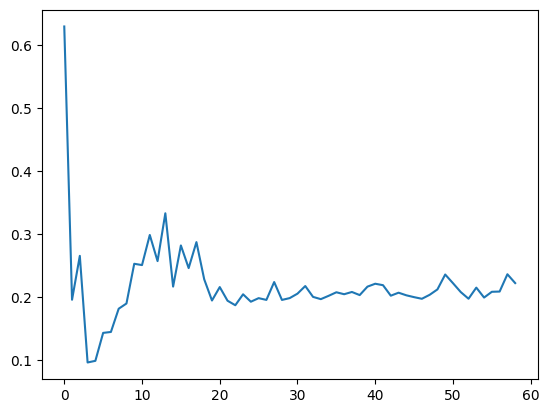

In [92]:
# N = 15
# alpha = 0.05
plt.plot(test_loss)

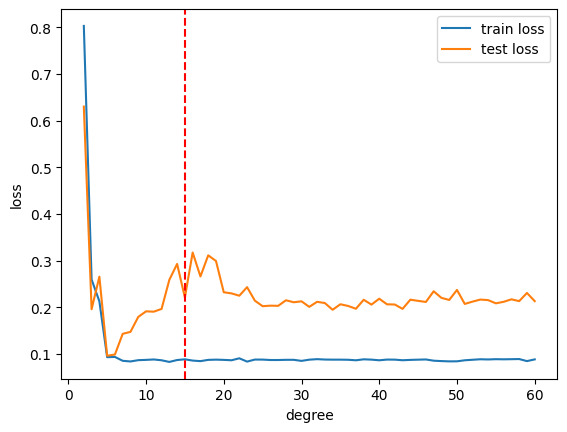

In [99]:
plt.plot(range(2, degree+1), train_loss, label='train loss')
plt.plot(range(2, degree+1), test_loss, label='test loss')
plt.xlabel('degree')
plt.ylabel('loss')
plt.axvline(x=15, color='red', linestyle='--')
plt.legend()
plt.show()

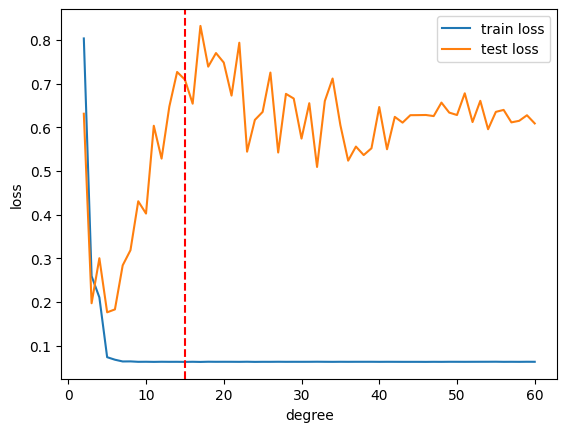

In [103]:
# N = 15
# alpha = 0.005
plt.plot(range(2, degree+1), train_loss, label='train loss')
plt.plot(range(2, degree+1), test_loss, label='test loss')
plt.xlabel('degree')
plt.ylabel('loss')
plt.axvline(x=15, color='red', linestyle='--')
plt.legend()
plt.show()

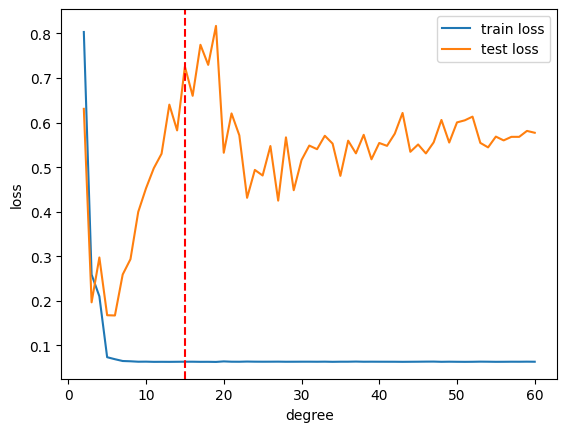

In [107]:
# N = 15
# alpha = 0.008
plt.plot(range(2, degree+1), train_loss, label='train loss')
plt.plot(range(2, degree+1), test_loss, label='test loss')
plt.xlabel('degree')
plt.ylabel('loss')
plt.axvline(x=15, color='red', linestyle='--')
plt.legend()
plt.show()

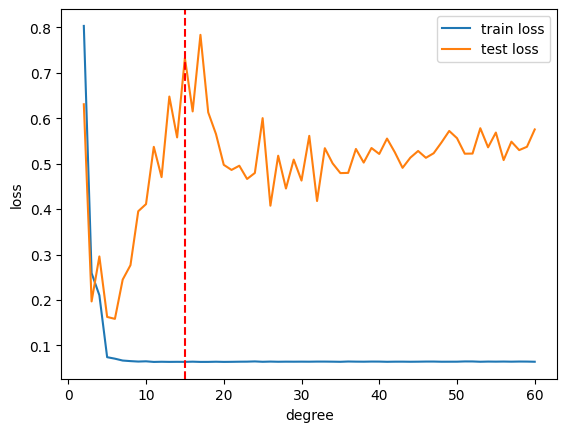

In [113]:
# N = 15
# alpha = 0.01
plt.plot(range(2, degree+1), train_loss, label='train loss')
plt.plot(range(2, degree+1), test_loss, label='test loss')
plt.xlabel('degree')
plt.ylabel('loss')
plt.axvline(x=15, color='red', linestyle='--')
plt.legend()
plt.show()

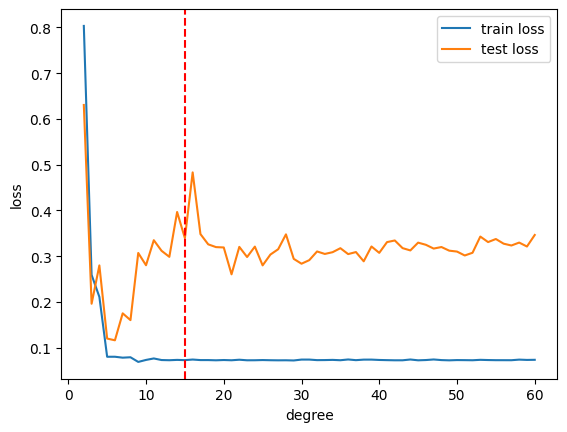

In [116]:
# N = 15
# alpha = 0.03
plt.plot(range(2, degree+1), train_loss, label='train loss')
plt.plot(range(2, degree+1), test_loss, label='test loss')
plt.xlabel('degree')
plt.ylabel('loss')
plt.axvline(x=15, color='red', linestyle='--')
plt.legend()
plt.show()